# DATA 601 Project
    Domestic Movie Analysis from 1972-2016 – Have Domestic Films Gotten Worse? 
    
#### By: 
* Brian Englum
* Tyler Snow
* Joel Wheaton
* Kumar Pasupuleti

> **Purpose:**
> * Many movie fans and film critics believe that U.S. domestic movies have deteriorated in quality over time. Classic blockbusters like "The Godfather," "The Terminator," the Star Wars Episodes IV-VI seem to be a thing of the past. Studios and producers appear to be more interested in making animations; plot-absent, visually entertaining films; and never-ending sequels than making truly original, creative films. 
> * Although viewers and critics may feel this way, little research has been done on the topic.
> * The goal of this project is to use statistical analysis and data science tools to explore this topic and come to a conclusion, one way or another.  

In [41]:
# Imports

import pandas as pd
import csv
import numpy
import plotly.express as px

In [42]:
# Create initial DataFrame from movie_data.csv

df = pd.read_csv('movie_data.csv')
print(f'This dataset has {df.shape[0]} movies.' )
df.sample(1)

This dataset has 16328 movies.


,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
11567,The Mustang,2019.0,Drama,6.8,95,77.0,6.903,"14,668",6 wins & 10 nominations,"$5,043,620",movie,Laure de Clermont-Tonnerre,"France, Belgium, United States"


In [85]:
df[df['Title']=='12 Years a Slave']

,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
15295,12 Years a Slave,2013.0,"Biography, Drama, History",8.1,95,96.0,7.94,"751,913",Won 3 Oscars. 244 wins & 337 nominations total,56671993.0,movie,Steve McQueen,"United Kingdom, United States"


## I: Data Cleaning

### Step 1: Restrict years used from 1973 to 2023.  Extreme outliers or no data exists for movies outside these ranges.

In [45]:
df = df[(df['Year'] >= 1973.0) & (df['Year'] <= 2023.0)]

### Step 2: Remove '$' and ',' char's from the GDBOS column values and turns them into <<float>>.

In [47]:
df['Gross Domestic Box Office Sales ($)'] = df['Gross Domestic Box Office Sales ($)'].astype(str).apply(lambda x: ''.join([char for char in x if char not in ['$',',']])).astype(float)
df.sample(1)

,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
13,Saving Private Ryan,1998.0,"Drama, War",8.6,94,91.0,8.2,"1,528,812",Won 5 Oscars. 79 wins & 75 nominations total,217049603.0,movie,Steven Spielberg,United States


### Step 3: Create a DataFrame (df_movie_ratings) that allows data analysis of movie rating metrics.
- Change rating system values from str to float.
- Drop NaN values.

In [49]:
# Changes rating system values (EXCEPT RT) from str to float.

df['IMDB'] = df['IMDB'].astype(float)
df['Metacritic'] = df['Metacritic'].astype(float)
df['TMDB'] = df['TMDB'].astype(float)

# Assigns 'None' to invalid RT ratings, i.e. '31/10' and etc, and removes them in df_movie_ratings.    

def clean_rotten_tom(rtg):
    if type(rtg) is str:
        if '/' in rtg:
            return None
        else: 
            return rtg
    else: 
        return rtg

print("Number of movies BEFORE removing 'bad' RT ratings:", df.shape[0])

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(clean_rotten_tom)
df_RT = df.dropna(subset='Rotten Tomatoes')

print("Number of movies AFTER removing 'bad' RT ratings:", df_RT.shape[0])

df_RT['Rotten Tomatoes'] = df_RT['Rotten Tomatoes'].astype(float)

df.sample(1)

Number of movies BEFORE removing 'bad' RT ratings: 15849
Number of movies AFTER removing 'bad' RT ratings: 10963


/var/folders/yx/32mlh_nx5ns6v1zmf7rs6l8h0000gn/T/ipykernel_2682/2639027596.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
12354,Fear,2023.0,Horror,3.7,21,NaN,5.3,"2,199",NaN,2090261.0,movie,Deon Taylor,United States


## II: Data Visualization

### A. Movie Ratings as a Function of Time (in years)

#### Step 1) Group movie data by year and then use aggregation to find averages per metric per year.

In [53]:
# Group by year and find average ratings per metric per year.

df_groupby_year_no_RT = df.groupby("Year").aggregate({
    'IMDB':'mean',
    'Metacritic':'mean',
    'TMDB':'mean'})

df_groupby_year_no_RT = df_groupby_year_no_RT.reset_index()

df_groupby_year_with_RT = df_RT.groupby("Year").aggregate({
    'Rotten Tomatoes': 'mean',
    })

df_groupby_year_with_RT = df_groupby_year_with_RT.reset_index()

#### Step 2) Plot (4) line graphs containing movie ratings per metric as a function of time, in years.

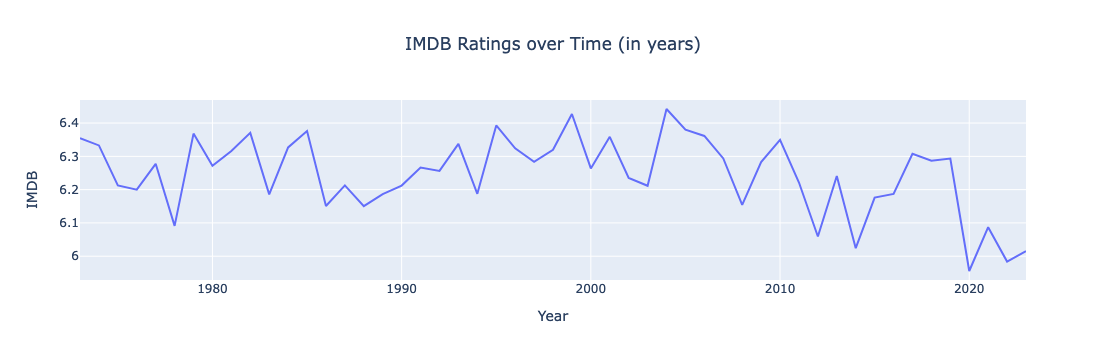

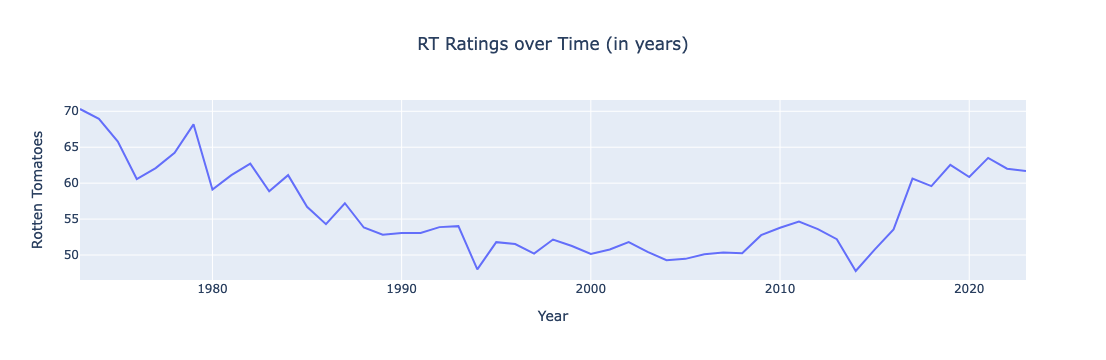

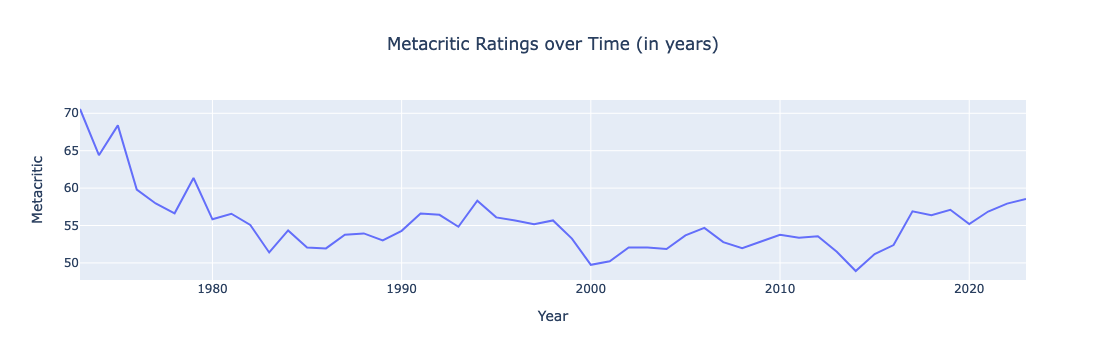

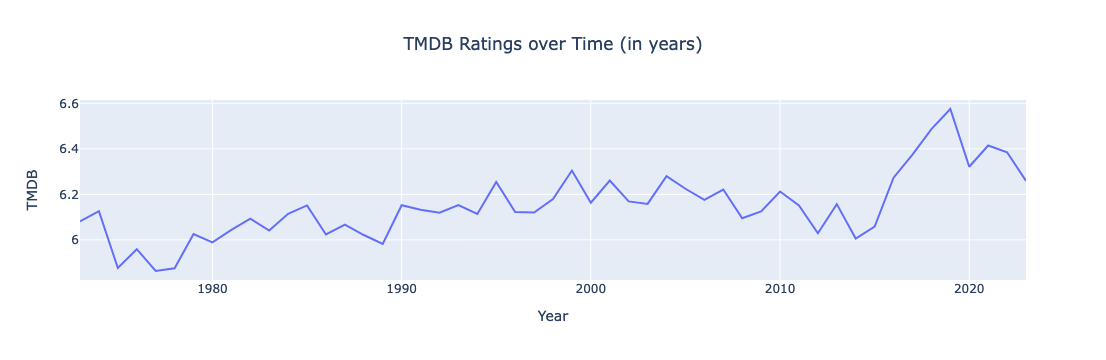

In [55]:
# Plot movie ratings per metric per year.

fig1 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'IMDB',
    title='IMDB Ratings over Time (in years)'
)

fig2 = px.line(
    df_groupby_year_with_RT,
    x = 'Year',
    y = 'Rotten Tomatoes',
    title='RT Ratings over Time (in years)'
)

fig3 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'Metacritic',
    title='Metacritic Ratings over Time (in years)'
)

fig4 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'TMDB',
    title='TMDB Ratings over Time (in years)'
)
fig1.update_layout(title_x = .5)
fig2.update_layout(title_x = .5)
fig3.update_layout(title_x = .5)
fig4.update_layout(title_x = .5)

fig1.show()
fig2.show()
fig3.show()
fig4.show()
    

### B. Movie Ratings **(by genre)** as a Function of Time (in years)

In [57]:
df_genres = df.copy()
print("Number of movies BEFORE removing those without genres:", df_genres['Genre(s)'].shape[0])
df_genres = df_genres.dropna(subset='Genre(s)')
print("Number of movies AFTER removing those without genres:", df_genres['Genre(s)'].shape[0])

df_genres_RT = df_RT.copy()
df_genres_RT = df_genres_RT.dropna(subset='Genre(s)')

Number of movies BEFORE removing those without genres: 15849
Number of movies AFTER removing those without genres: 14139


In [58]:
def classify_genre(genres):
    genres_list = genres.strip().split(',')

    for i in range(1, len(genres_list)):
        genres_list[i] = genres_list[i].strip()

    genre_types = ['Comedy',
                   'Action',
                   'Drama',
                   'Horror',
                   'Documentary',
                   'Animation',
                   'War',
                   'Fantasy',
                   'Crime',
                   'Musical',
                   'Adventure',
                   'Family',
                   'Thriller',
                   'Short',
                   'Sport',
                   'Musical',
                   'Music',
                   'Romance'
                  ]
                   
    
    for genre_type in genre_types:
        if genre_type in genres_list:
            return genre_type
    if "Comedy" in genres_list:
        return "Comedy"
    if "Action" in genres_list:
        return "Action"
    if "Drama" in genres_list:
        return "Drama"
    if "Horror" in genres_list:
        return "Horror"
    if "Documentary" in genres_list:
        return "Documentary"
    if "Animation" in genres_list:
        return "Animation"
    if "War" in genres_list:
        return "War"
    if "Fantasy" in genres_list:
        return "Fantasy"
    if "Crime" in genres_list:
        return "Crime"
    if "Musical" in genres_list:
        return "Musical"
    if "Sci-Fi" in genres_list:
        return "Sci-Fi"
    if "Adventure" in genres_list:
        return "Adventure"       
    else:
        return genres
        
df_genres.reset_index()
df_genres_RT.reset_index()

df_genres['Genre(s)'] = df_genres['Genre(s)'].apply(str).apply(classify_genre)

df_genres_RT['Genre(s)'] = df_genres_RT['Genre(s)'].apply(str).apply(classify_genre)

In [59]:
df_groupby_genres = df_genres.groupby(['Year','Genre(s)']).aggregate(
    {'IMDB': 'mean',
     'Metacritic': 'mean',
     'TMDB': 'mean'
    }
)

df_groupby_genres_RT = df_genres_RT.groupby(['Year','Genre(s)']).aggregate(
    {'Rotten Tomatoes': 'mean'}
)
df_groupby_genres.reset_index().sample(5)

,Year,Genre(s),IMDB,Metacritic,TMDB
543,2021.0,Romance,6.3500,46.000000,6.700000
571,2023.0,Musical,6.0500,44.000000,7.300000
158,1987.0,Fantasy,5.8000,NaN,4.950000
102,1982.0,Documentary,6.5000,NaN,5.900000
289,2000.0,Comedy,6.0375,46.872549,6.028426


In [60]:
# Question: What are the most frequent genre(s)?
# Answer: Comedy, Drama, Action, and Horror
df_genres['Genre(s)'].value_counts()


Genre(s)
Comedy         5249
Drama          4616
Action         2225
Horror          853
Documentary     586
Fantasy         100
Thriller         96
Crime            93
Animation        84
Short            65
Adventure        51
Musical          21
Music            15
Adult            11
Sci-Fi           10
Family            9
Western           9
War               7
Talk-Show         7
History           6
News              6
Romance           6
Reality-TV        5
Biography         3
Mystery           3
Sport             3
Name: count, dtype: int64

In [61]:
df_groupby_genres2 = df_groupby_genres.reset_index()
df_groupby_genres2 = df_groupby_genres2[
    (df_groupby_genres2['Genre(s)'] == 'Drama') | 
    (df_groupby_genres2['Genre(s)'] == "Action") | 
    (df_groupby_genres2['Genre(s)'] == "Comedy") | 
    (df_groupby_genres2['Genre(s)'] == "Horror")
]

df_groupby_genres_RT_2 = df_groupby_genres_RT.reset_index()
df_groupby_genres_RT_2 = df_groupby_genres_RT_2[
    (df_groupby_genres_RT_2['Genre(s)'] == 'Drama') | 
    (df_groupby_genres_RT_2['Genre(s)'] == "Action") | 
    (df_groupby_genres_RT_2['Genre(s)'] == "Comedy") | 
    (df_groupby_genres_RT_2['Genre(s)'] == "Horror")
]

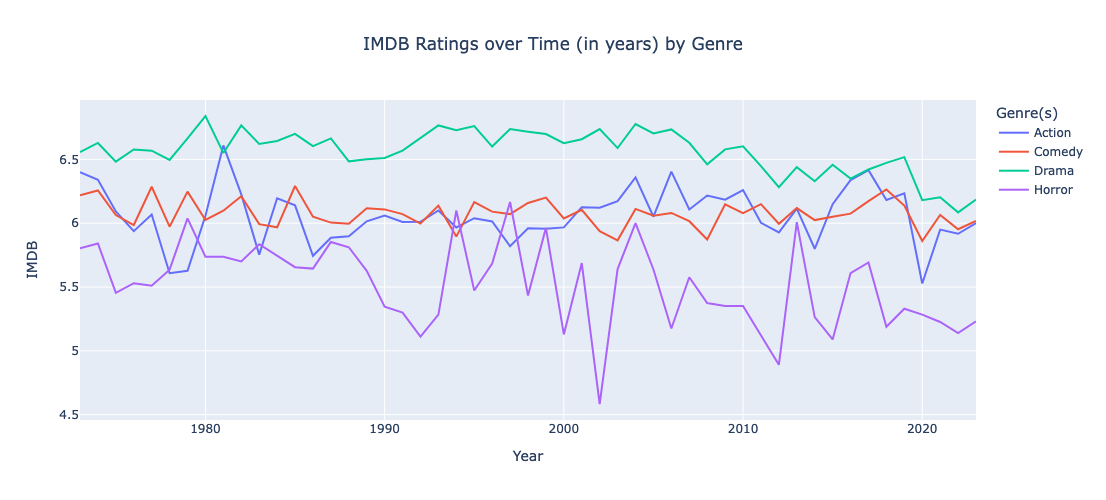

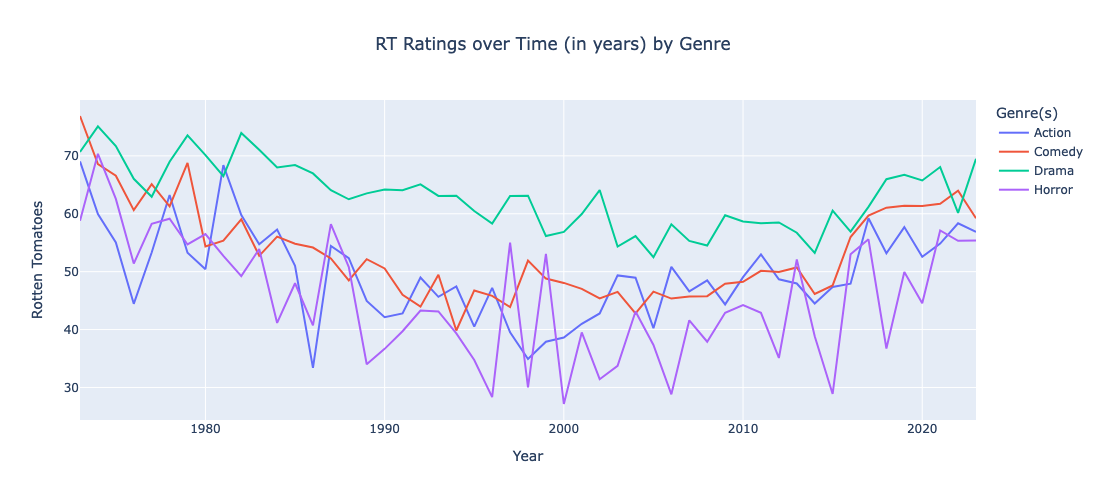

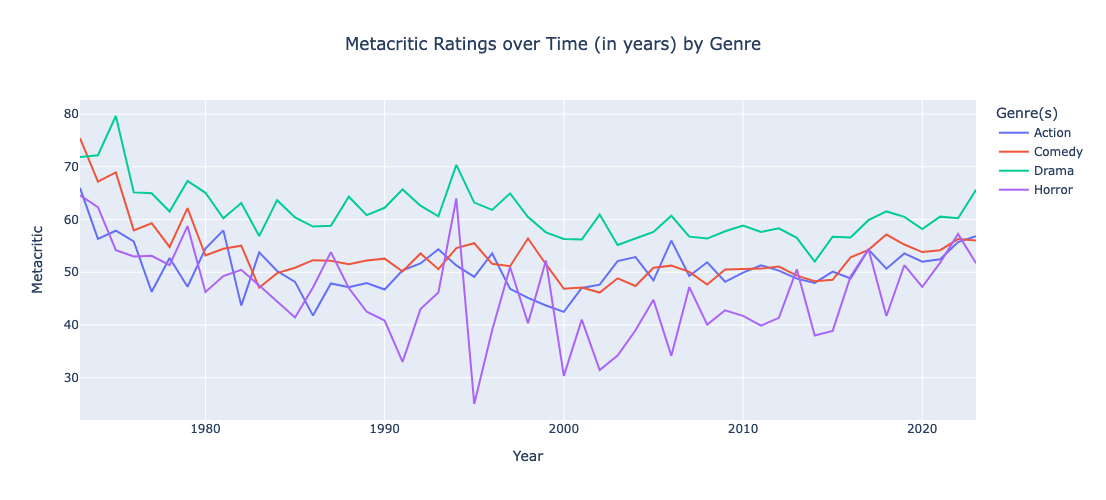

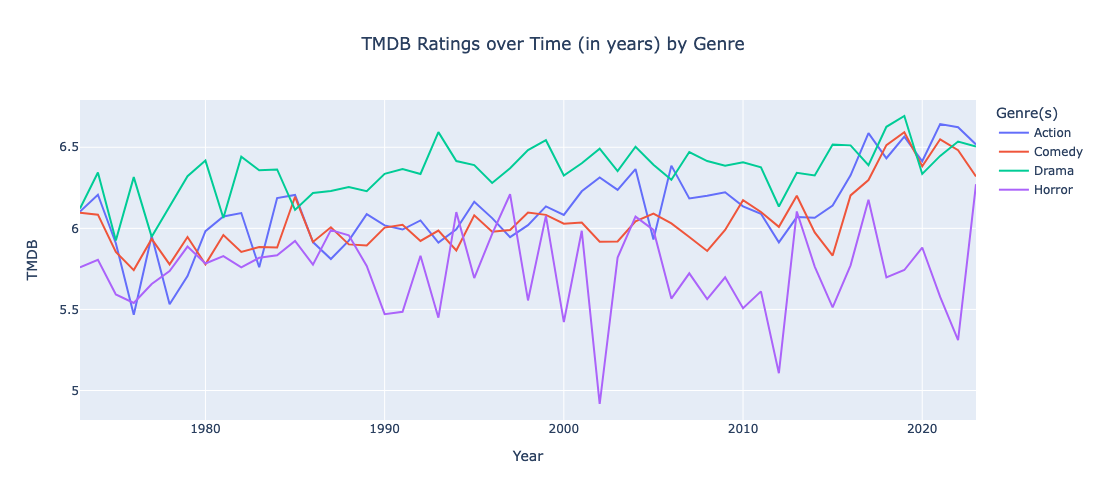

In [62]:
# Plot movie ratings (by genre) per metric per year.

fig1 = px.line(
    df_groupby_genres2,
    x = 'Year',
    y = 'IMDB',
    color = 'Genre(s)',
    title='IMDB Ratings over Time (in years) by Genre',
    height = 500
)

fig2 = px.line(
     df_groupby_genres_RT_2,
     x = 'Year',
     y = 'Rotten Tomatoes',
     color = 'Genre(s)',
     title='RT Ratings over Time (in years) by Genre',
     height = 500
)

fig3 = px.line(
     df_groupby_genres2,
     x = 'Year',
     y = 'Metacritic',
     color = 'Genre(s)',
     title='Metacritic Ratings over Time (in years) by Genre ',
     height = 500
)

fig4 = px.line(
     df_groupby_genres2,
     x = 'Year',
     y = 'TMDB',
     color = 'Genre(s)',
     title='TMDB Ratings over Time (in years) by Genre',
     height = 500
)

fig1.update_layout(title_x = .5)
fig2.update_layout(title_x = .5)
fig3.update_layout(title_x = .5)
fig4.update_layout(title_x = .5)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

### C. Total Gross Domestic Box Office Sales (GDBOS) By Year, Adjusted for Inflation

Step 1: Drop all movies that have NaN in GDBOS column.

In [65]:
df_GDBOS = df.dropna(subset=['Gross Domestic Box Office Sales ($)'])

print(f'A total of {df.shape[0]-df_GDBOS.shape[0]} movies were removed.')

A total of 6589 movies were removed.
